### Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

In [203]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.patches as mpatches

In [204]:
# Set up the data
data = "../data/"
train = "datasets/clean_train.csv"
test = "datasets/test.csv"

In [205]:
#Read in the data
train_df = pd.read_csv(data+train)
test_df = pd.read_csv(data+test)

In [206]:
# Features chosen thru EDA and cleaning
features  = ['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']

In [207]:
# Model 4 considers the transform log(y)
train_df['SalePrice_log'] = np.log(train_df.SalePrice)
y_log = train_df['SalePrice_log']

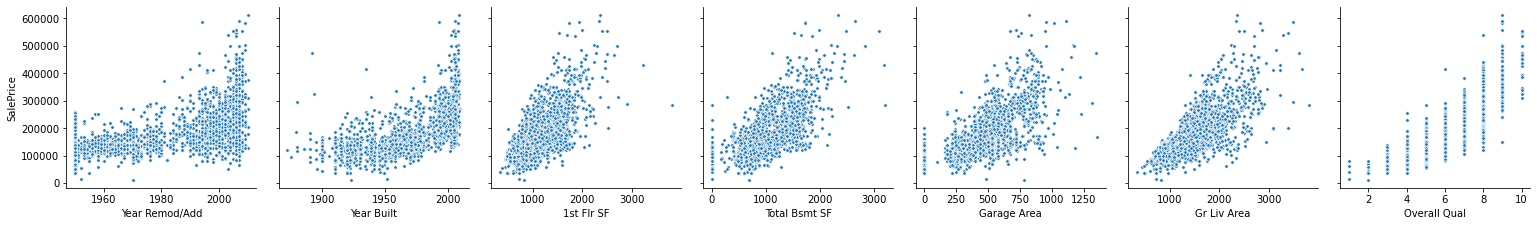

In [208]:
#sns.pairplot(df);
sns.pairplot(train_df, x_vars=features, y_vars=['SalePrice'],height=3,plot_kws={"s": 13});

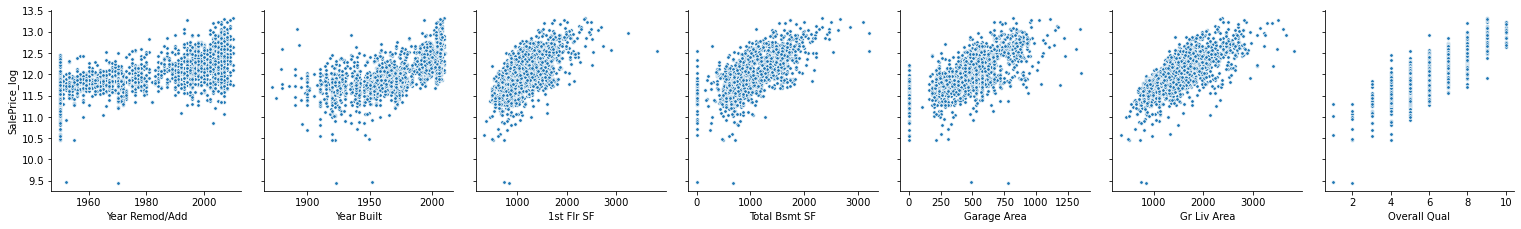

In [209]:
#sns.pairplot(df);
sns.pairplot(train_df, x_vars=features, y_vars=['SalePrice_log'],height=3,plot_kws={"s": 13});

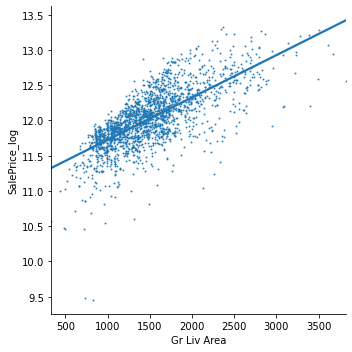

In [210]:
sns.lmplot(x='Gr Liv Area', y='SalePrice_log', data=train_df, 
           ci=False, fit_reg=True,scatter_kws={"s": 1});

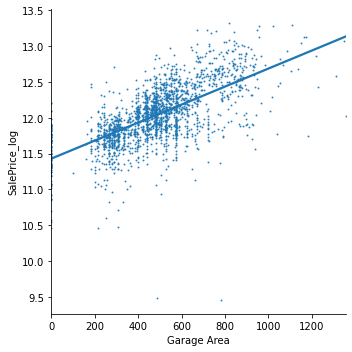

In [211]:
sns.lmplot(x='Garage Area', y='SalePrice_log', data=train_df, 
           ci=False, fit_reg=True, height=5,scatter_kws={"s": 1});

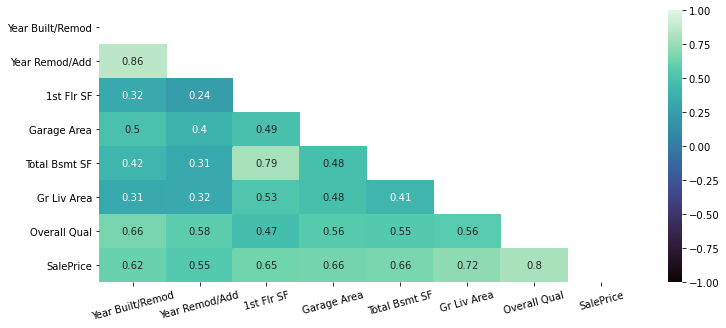

In [212]:
# ID coeff that have the strongest correlation with Sale Price and which ones may be collinear
corr = train_df[['Year Built/Remod','Year Remod/Add', '1st Flr SF','Garage Area','Total Bsmt SF', 'Gr Liv Area', 'Overall Qual','SalePrice']].corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.figure(figsize = (12, 5));
sns.heatmap(corr, mask = mask, cmap = 'mako', annot = True, vmin=-1, vmax=1);
plt.xticks( rotation=15 );

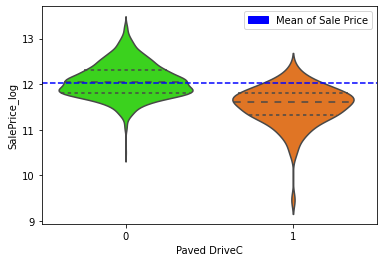

In [213]:
sns.violinplot("Paved DriveC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

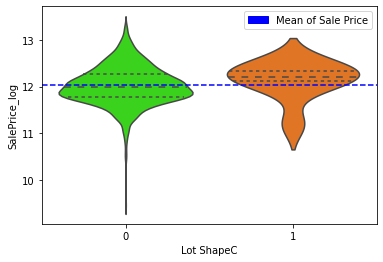

In [214]:
sns.violinplot("Lot ShapeC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

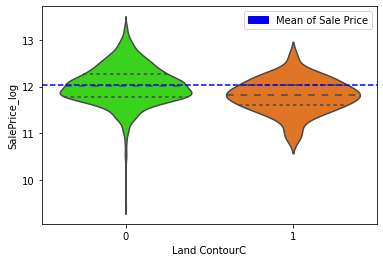

In [215]:
sns.violinplot("Land ContourC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

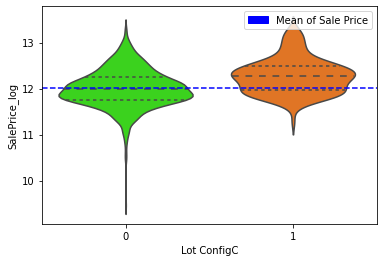

In [216]:
sns.violinplot("Lot ConfigC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

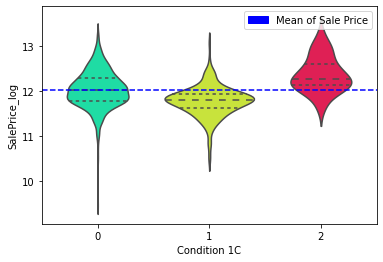

In [217]:
sns.violinplot("Condition 1C", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

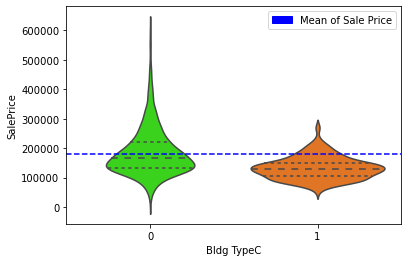

In [218]:
sns.violinplot("Bldg TypeC", "SalePrice", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

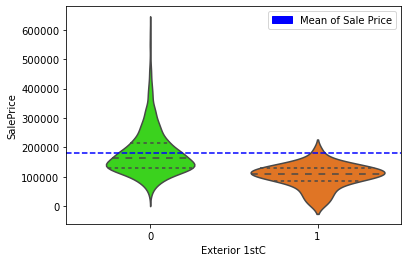

In [219]:
sns.violinplot("Exterior 1stC", "SalePrice", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

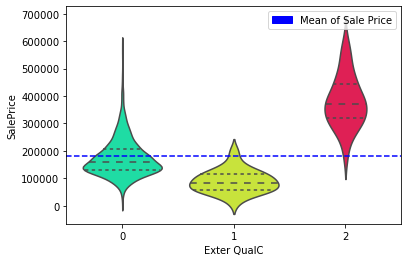

In [220]:
sns.violinplot("Exter QualC", "SalePrice", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

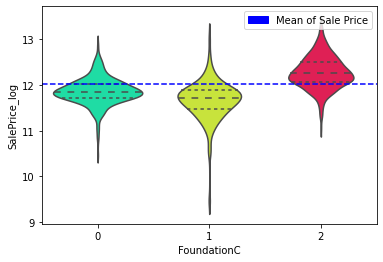

In [221]:
sns.violinplot("FoundationC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

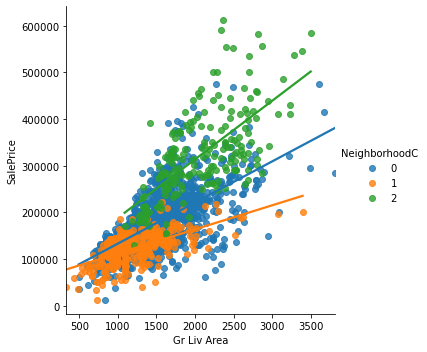

In [222]:
sns.lmplot(x='Gr Liv Area', y='SalePrice', data=train_df,ci=False, hue='NeighborhoodC');

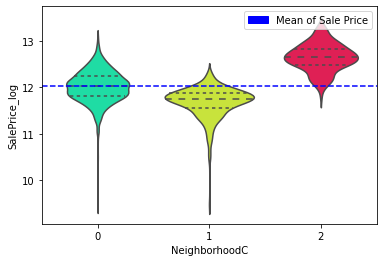

In [223]:
sns.violinplot("NeighborhoodC", "SalePrice_log", data=train_df, palette='gist_ncar', inner='quartile');
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="b", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

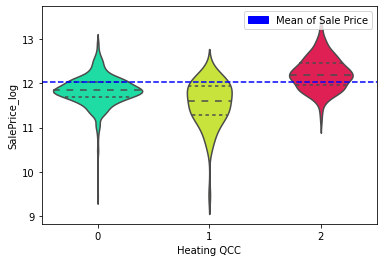

In [224]:
sns.violinplot("Heating QCC", "SalePrice_log", data=train_df, palette='gist_ncar', inner='quartile');
plt.axhline(train_df['SalePrice_log'].mean(), color="b", linestyle = '--');"box", "quartile", "point", "stick"
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

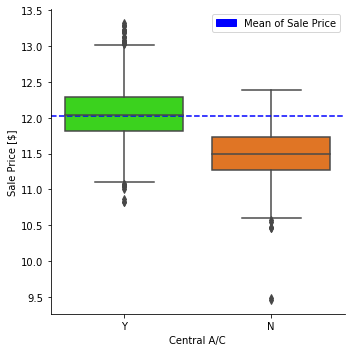

In [225]:
g = sns.catplot('Central Air','SalePrice_log', data=train_df, kind="box",palette='gist_ncar')
g.set_axis_labels("Central A/C", "Sale Price [$]");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="b", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

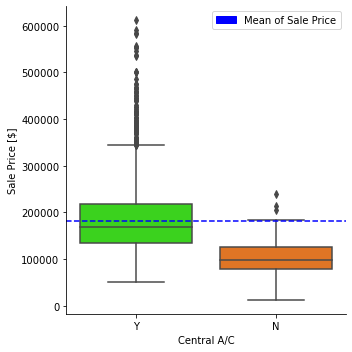

In [226]:
g = sns.catplot('Central Air','SalePrice', data=train_df, kind="box",palette='gist_ncar')
g.set_axis_labels("Central A/C", "Sale Price [$]");
plt.axhline(train_df['SalePrice'].mean(), color="b", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

## Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

##### Model 1 Setup:

In [227]:
# Set up X-features and our y-target from the train_df to feed into regression models

X = train_df[features]
y_actual = train_df['SalePrice']

In [228]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss = StandardScaler()
ss.fit(X)
Z = ss.transform(X)

In [229]:
Z_df = pd.DataFrame(Z)
Z = Z_df.rename(columns={0: "Year Remod/Add",
                            1: "Year Built", 
                            2: "1st Flr SF",
                            3: "Total Bsmt SF",
                            4: "Garage Area",
                            5: "Gr Liv Area",
                            6: "Overall Qual"})

In [230]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train, Z_test, y_train, y_test = train_test_split(Z, y_actual, random_state=42)

##### Model 2 Setup:

In [231]:
# Set up numerical X-features and y-target from the train_df to feed into regression models
features2 = ['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual',
             'NeighborhoodC']

X2 = train_df[features] #Using features, not features2 because I don't want to scale my NeighborhoodC feature
y_actual = train_df['SalePrice']

In [232]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss2 = StandardScaler()
ss2.fit(X2)
Z2 = ss2.transform(X2)

In [233]:
# I want to keep my feature names as columns
Z2_df = pd.DataFrame(Z2)
Z2 = Z2_df.rename(columns={0: "Year Remod/Add",
                            1: "Year Built", 
                            2: "1st Flr SF",
                            3: "Total Bsmt SF",
                            4: "Garage Area",
                            5: "Gr Liv Area",
                            6: "Overall Qual"})

In [234]:
#One-hot encode categorical Neighborhood feature
class_dummy = pd.get_dummies( data=train_df[['NeighborhoodC']], columns= [ 'NeighborhoodC' ], drop_first=True)

In [235]:
# Concatenate scaled-numerical and encoded-categorical data for testing
Z2 = pd.concat([Z2,class_dummy], axis=1)

In [236]:
# create a features list for future reference
features2_dummified = list(Z2.columns)

In [237]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train2, Z_test2, y_train2, y_test2 = train_test_split(Z2, y_actual, random_state=42)

##### Model 3 Setup:

In [238]:
# List of new categorical features being included in the OLS Model
cat_features = ['Paved DriveC',
                 'Lot ShapeC',
                 'Land ContourC',
                 'Lot ConfigC',
                 'Condition 1C',
                 'Bldg TypeC',
                 'Exterior 1stC',
                 'Exter QualC',
                 'FoundationC',
                 'Heating QCC',
                 'Central AirC']

# Here is the full feature list for clarity, tho I won't actually use this yet
features3 = ['Year Built/Remod', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area','Gr Liv Area', 'Overall Qual',
             'NeighborhoodC', 'Paved DriveC', 'Lot ShapeC', 'Land ContourC','Lot ConfigC', 'Condition 1C','Bldg TypeC',
             'Exterior 1stC','Exter QualC', 'FoundationC', 'Heating QCC', 'Central AirC']

In [239]:
#One-hot encode new categorical variables
Z3 = Z2.copy() #Again, saving a little time by starting with a little help from the previous model
for col in cat_features:
    cat_dummy = pd.get_dummies(data=train_df[[col]], columns= [col], drop_first=True)
    Z3 = pd.concat([Z3, cat_dummy],axis=1)

In [240]:
Z3.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,NeighborhoodC_1,NeighborhoodC_2,Paved DriveC_1,...,Condition 1C_2,Bldg TypeC_1,Exterior 1stC_1,Exter QualC_1,Exter QualC_2,FoundationC_1,FoundationC_2,Heating QCC_1,Heating QCC_2,Central AirC_1
0,0.990597,0.142275,-1.150368,-0.770993,0.009453,-0.034353,-0.077344,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.610040,0.805534,-0.654434,-0.329949,0.401136,1.289603,0.626311,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1.085736,-0.620473,-0.274570,0.007871,-1.058349,-0.903263,-0.780998,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
# Keep a list of model 3 features for clarity
features3_dummified = list(Z3.columns)

In [254]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train3, Z_test3, y_train3, y_test3 = train_test_split(Z3, y_actual, random_state=42)

##### Model 4: Same as Model 3, but with log(y)-target ('SalePrice') 

In [243]:
# Full list of features included in Model 4 for clarity
features4 = ['Year Built/Remod', 'Year Remod/Add', '1st Flr SF','Total Bsmt SF','Garage Area','Gr Liv Area', 'Overall Qual',
              'NeighborhoodC', 'Paved DriveC', 'Lot ShapeC', 'Land ContourC','Lot ConfigC', 'Condition 1C','Bldg TypeC',
              'Exterior 1stC','Exter QualC', 'FoundationC', 'Heating QCC', 'Central AirC']

# List of categorical features included in the 4th OLS Model
cat_features4 = ['Paved DriveC',
                 'Lot ShapeC',
                 'Land ContourC',
                 'Lot ConfigC',
                 'Condition 1C',
                 'Bldg TypeC',
                 'Exterior 1stC',
                 'Exter QualC',
                 'FoundationC',
                 'Heating QCC',
                 'Central AirC',
                 'NeighborhoodC']

In [244]:
# Assign the numerical features to be scaled, notice a new interaction term 'Year Built/Remod'
# Year Built has been omitted to mitigate multicollinearity of features
X4 = train_df[['Year Built/Remod', 'Year Remod/Add', '1st Flr SF','Total Bsmt SF','Garage Area','Gr Liv Area', 'Overall Qual']]

In [245]:
# Taking the log transform of y returns a distribution of SalePrice in the training dataset that looks a lot more Normal
# Additionally, this will help with outliers
y_log = np.log(y_actual)

In [246]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss4 = StandardScaler()
ss4.fit(X4)
Z4 = ss4.transform(X4)

In [247]:
# Create a pd.DataFrame from np.Series for concat of numerical and categorical features
Z4_df = pd.DataFrame(Z4)

In [248]:
# I want to keep my feature names as columns
Z4 = Z4_df.rename(columns={ 0: 'Year Built/Remod',
                            1: 'Year Remod/Add', 
                            2: '1st Flr SF',
                            3: 'Total Bsmt SF',
                            4: 'Garage Area',
                            5: 'Gr Liv Area',
                            6: 'Overall Qual'})

In [249]:
#One-hot encode new categorical variables
for col in cat_features4:
    cat_dummy = pd.get_dummies(data=train_df[[col]], columns= [col], drop_first=True)
    Z4 = pd.concat([Z4, cat_dummy],axis=1)

In [250]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train4, Z_test4, y_train4, y_test4 = train_test_split(Z4, y_log, random_state=42)

In [251]:
# Keep a list of model 3 features for clarity
features4_dummified = list(Z4.columns)

In [257]:
# Use IPython magic command %store to pass scaled & Test/Train-Split variables to Notebook: 03_Model_Benchmarks for model validation
# Got help from Stack Overflow on sharing variables between notebooks
#<https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks>

# Model 1 Variables
%store Z_train
%store Z_test
%store y_train
%store y_test
%store features

# Model 2 Variables
%store Z_train2
%store Z_test2
%store y_train2
%store y_test2
%store features2
%store features2_dummified

# Model 3 Variables
%store Z_train3
%store Z_test3
%store y_train3
%store y_test3
%store features3
%store features3_dummified

# Model 4 Variables
%store Z_train4
%store Z_test4
%store y_train4
%store y_test4
%store features4
%store features4_dummified

Stored 'Z_train' (DataFrame)
Stored 'Z_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'features' (list)
Stored 'Z_train2' (DataFrame)
Stored 'Z_test2' (DataFrame)
Stored 'y_train2' (Series)
Stored 'y_test2' (Series)
Stored 'features2' (list)
Stored 'features2_dummified' (list)
Stored 'Z_train3' (DataFrame)
Stored 'Z_test3' (DataFrame)
Stored 'y_train3' (Series)
Stored 'y_test3' (Series)
Stored 'features3' (list)
Stored 'features3_dummified' (list)
Stored 'Z_train4' (DataFrame)
Stored 'Z_test4' (DataFrame)
Stored 'y_train4' (Series)
Stored 'y_test4' (Series)
Stored 'features4' (list)
Stored 'features4_dummified' (list)


In [ ]:
#Consider using automated feature selection.